### MNIST Result Exploration
Purpose of this notebook:
- Find out if there are configurations for which one framework is resilient and another isn't
- Find out if there are configuration for which both frameworks have high accuracy, but low resiliency

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("../old_data_and_files/multi_model_multi_metric_results_50samples_iotagpu.csv")

In [3]:
len(results)

800

In [5]:
results.head()

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,6a58d18e,0.827171,0.6188,0.490627,0.788839,0.485133,0.791640,0.505602,0.797996,0.663226,...,iotagpu02,140.221.68.6,335.161301,0,1,"1_batch_size=714,dropout=0.61279,epochs=69,lea...",0.080155,0.612793,69,714
1,6a5a2854,0.531257,0.4011,0.273756,0.400452,0.271170,0.400452,0.275695,0.400560,0.369305,...,iotagpu02,140.221.68.6,419.606244,0,1,"2_batch_size=714,dropout=0.83736,epochs=88,lea...",0.063934,0.837360,88,714
2,6a5aa8f6,0.885748,0.9132,0.739952,0.898855,0.739420,0.900719,0.769231,0.901251,0.843547,...,iotagpu02,140.221.68.6,305.104492,0,1,"3_batch_size=578,dropout=0.52074,epochs=62,lea...",0.069067,0.520743,62,578
3,6a5ad9ac,0.933856,0.9273,0.736809,0.941730,0.737165,0.944129,0.746403,0.936756,0.863018,...,iotagpu02,140.221.68.6,252.207514,0,1,"4_batch_size=866,dropout=0.59443,epochs=53,lea...",0.062085,0.594432,53,866
4,6a5b0df0,0.844316,0.8229,0.492658,0.842167,0.484197,0.846154,0.498784,0.844306,0.709435,...,iotagpu02,140.221.68.6,247.868385,0,1,"5_batch_size=791,dropout=0.64746,epochs=51,lea...",0.081445,0.647460,51,791


In [6]:
results['average_pt_resiliency'] = (results['pt_uniform_accuracy']+results['pt_gaussian_accuracy']+results['pt_saltandpepper_accuracy'])/3

In [7]:
results['average_tf_resiliency'] = (results['tf_uniform_accuracy']+results['tf_gaussian_accuracy']+results['tf_saltandpepper_accuracy'])/3

In [9]:
results['resiliency_difference'] = results['average_pt_resiliency'] - results['average_tf_resiliency']

In [10]:
results.head()

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference
0,6a58d18e,0.827171,0.6188,0.490627,0.788839,0.485133,0.791640,0.505602,0.797996,0.663226,...,0,1,"1_batch_size=714,dropout=0.61279,epochs=69,lea...",0.080155,0.612793,69,714,0.493787,0.792825,-0.299038
1,6a5a2854,0.531257,0.4011,0.273756,0.400452,0.271170,0.400452,0.275695,0.400560,0.369305,...,0,1,"2_batch_size=714,dropout=0.83736,epochs=88,lea...",0.063934,0.837360,88,714,0.273540,0.400488,-0.126948
2,6a5aa8f6,0.885748,0.9132,0.739952,0.898855,0.739420,0.900719,0.769231,0.901251,0.843547,...,0,1,"3_batch_size=578,dropout=0.52074,epochs=62,lea...",0.069067,0.520743,62,578,0.749534,0.900275,-0.150741
3,6a5ad9ac,0.933856,0.9273,0.736809,0.941730,0.737165,0.944129,0.746403,0.936756,0.863018,...,0,1,"4_batch_size=866,dropout=0.59443,epochs=53,lea...",0.062085,0.594432,53,866,0.740126,0.940872,-0.200746
4,6a5b0df0,0.844316,0.8229,0.492658,0.842167,0.484197,0.846154,0.498784,0.844306,0.709435,...,0,1,"5_batch_size=791,dropout=0.64746,epochs=51,lea...",0.081445,0.647460,51,791,0.491880,0.844209,-0.352329


In [11]:
biggest_resiliency_difference = results.sort_values('resiliency_difference')

In [12]:
biggest_resiliency_difference.head()

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference
211,be14ae90,0.541197,0.5841,0.204111,0.800467,0.207971,0.800467,0.210843,0.800467,0.518703,...,0,1,"12_batch_size=857,dropout=0.83233,epochs=24,le...",0.067956,0.832334,24,857,0.207641,0.800467,-0.592825
57,fab995ba,0.654049,0.6700,0.238494,0.795089,0.242072,0.795902,0.247601,0.800049,0.555407,...,0,1,"8_batch_size=946,dropout=0.89638,epochs=57,lea...",0.043290,0.896381,57,946,0.242722,0.797013,-0.554291
649,3708a6ce,0.339323,0.5432,0.197749,0.746910,0.201992,0.749124,0.201070,0.750600,0.466246,...,0,1,"50_batch_size=417,dropout=0.70964,epochs=21,le...",0.099066,0.709640,21,417,0.200271,0.748878,-0.548607
657,6d8ffaae,0.634479,0.6239,0.262943,0.799281,0.262453,0.800425,0.281071,0.802548,0.558387,...,0,1,"8_batch_size=471,dropout=0.81118,epochs=64,lea...",0.053146,0.811180,64,471,0.268822,0.800751,-0.531929
54,fab90ad2,0.582391,0.5423,0.171589,0.688416,0.176854,0.688988,0.176854,0.694483,0.465234,...,0,1,"5_batch_size=672,dropout=0.85492,epochs=53,lea...",0.060478,0.854921,53,672,0.175099,0.690629,-0.515530


In [18]:
biggest_resiliency_difference.tail()

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference
313,49db464a,0.974585,0.9608,0.973269,0.899779,0.973106,0.900025,0.975149,0.888907,0.943202,...,0,1,"14_batch_size=941,dropout=0.20162,epochs=29,le...",0.052437,0.201616,29,941,0.973841,0.896237,0.077604
369,9e6bf6ac,0.994133,0.9742,0.988203,0.903223,0.989449,0.903798,0.987531,0.900249,0.955098,...,0,1,"20_batch_size=802,dropout=0.41486,epochs=53,le...",0.013421,0.414858,53,802,0.988394,0.902423,0.085971
498,82c366e2,0.618153,0.5187,0.539788,0.420424,0.531830,0.427056,0.547745,0.424403,0.503512,...,0,1,"49_batch_size=58,dropout=0.65167,epochs=56,lea...",0.052202,0.651668,56,58,0.539788,0.423961,0.115827
529,74d03e26,0.696530,0.6858,0.682024,0.544632,0.687783,0.546277,0.698478,0.550802,0.636541,...,0,1,"30_batch_size=187,dropout=0.3685,epochs=92,lea...",0.091067,0.368498,92,187,0.689428,0.547237,0.142191
568,537854c8,0.589117,0.5235,0.565934,0.428571,0.587912,0.428571,0.587912,0.423077,0.516824,...,0,1,"19_batch_size=14,dropout=0.36295,epochs=44,lea...",0.049795,0.362949,44,14,0.580586,0.426740,0.153846


### Is model accuracy entirely based off of epochs?

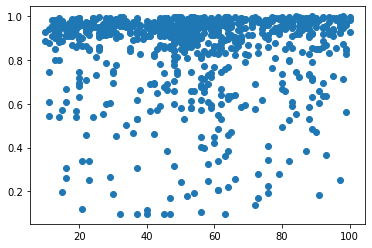

In [20]:
plt.scatter(results['config.epochs'], results['pt_test_acc'])

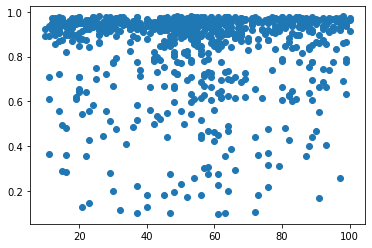

In [21]:
plt.scatter(results['config.epochs'], results['tf_test_acc'])

### Top configurations where test accuracy is high, but resiliency is low

In [22]:
results['average_test_accuracy'] = (results['pt_test_acc']+results['tf_test_acc'])/2

In [23]:
results['average_resiliency'] = (results['average_pt_resiliency']+results['average_tf_resiliency'])/2

In [25]:
results['test_resiliency_diff'] = results['average_test_accuracy'] - results['average_resiliency']

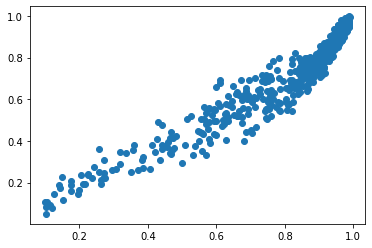

In [24]:
plt.scatter(results['average_test_accuracy'], results['average_resiliency'])

In [28]:
high_test_low_res = results.sort_values('test_resiliency_diff', ascending=False)

In [29]:
high_test_low_res.head()

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference,average_test_accuracy,average_resiliency,test_resiliency_diff
239,be19a1ac,0.695225,0.6671,0.250991,0.550756,0.248969,0.553345,0.257138,0.547359,0.471360,...,0.067072,0.810501,30,951,0.252366,0.550487,-0.298121,0.681163,0.401426,0.279736
465,82bd76ec,0.857456,0.7834,0.472097,0.601307,0.485671,0.601307,0.492207,0.601307,0.611844,...,0.026116,0.801805,53,153,0.483325,0.601307,-0.117982,0.820428,0.542316,0.278112
638,3706a0ea,0.848234,0.5588,0.425743,0.450876,0.428027,0.451637,0.428027,0.451637,0.505373,...,0.055170,0.804748,23,606,0.427266,0.451384,-0.024118,0.703517,0.439325,0.264192
26,6a5fc368,0.826578,0.7891,0.405336,0.685211,0.403444,0.683130,0.418866,0.687766,0.612429,...,0.054412,0.814961,58,813,0.409216,0.685369,-0.276154,0.807839,0.547292,0.260547
738,9eae558c,0.729946,0.6990,0.375169,0.543860,0.358974,0.543860,0.421053,0.543860,0.526965,...,0.051029,0.543485,25,57,0.385065,0.543860,-0.158794,0.714473,0.464462,0.250011
